# ECO3063: Computational Method in Macroeconomics Coursework Question 1

In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
from scipy.optimize import fmin
import seaborn as sns
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

## Calibration and Welfare Analysis (30%)

## Question 1A

In [2]:
# Step 1: Load Data
data = pd.read_csv('data_prescott.csv')
data_country = data["country"].iloc[0:7]
data_c2y9396 = data["c2y"].iloc[0:7]
data_tau9396 = data["tau"].iloc[0:7]
data_hdata9396 = data["h"].iloc[0:7]
data_c2y7074 = data["c2y"].iloc[7:14]
data_tau7074 = data["tau"].iloc[7:14]
data_hdata7074 = data["h"].iloc[7:14]

In [3]:
data.columns = data.columns.str.strip() #Minor data cleaning to rid whitespace issue

Few Comments on what the columns represent

**Period** = The time period being observers
<br>
**Country** = The countries being observed in the experiment
<br>
**h** = Hours worked per person aged 15-64 per week
<br>
**tau** = Effective Tax Rate
<br>
**c2y** = Consumption-Output Ratio


In [4]:
def LossFcn(alfa, theta, data):
    # This is the loss function for calibration calculating the sum of the squared residuals
    # input: calibrated preference parameter, alfa
    #        predeteremined production parameter, theta
    #        data inputs (dictionary), data
    # output: sum of the squared residuals

    # Calculate the model's solution for hours worked for a given alpha
    hmodel9396 = 100.*(1-theta) / (alfa/(1-data_tau9396) * data[c2y9396] + (1-theta))
    hmodel7074 = 100.*(1-theta) / (alfa/(1-data[tau7074]) * data[c2y7074] + (1-theta))
    
    # Calculate the sum of the squared residuals
    loss = sum((data[hdata9396] - hmodel9396)**2) + sum((data[hdata7074] - hmodel7074)**2)
    
    return loss

In [5]:
# Step 2: Set Predetermined Parameter(s)
theta = 0.32

In [6]:
# Step 3: Calibrate the preference parameter alpha
from scipy.optimize import minimize_scalar

def loss_func(alfa, theta, data):
    # Calculate the model's solution for hours worked for a given alpha
    hmodel9396 = 100.*(1-theta ) / ( alfa/(1-data_tau9396) * data_c2y9396  + (1-theta ) )
    hmodel7074 = 100.*(1-theta ) / ( alfa/(1-data_tau7074) * data_c2y7074  + (1-theta ) )
    # Calculate the sum of the squared residuals
    loss = sum( ( data_hdata9396 - hmodel9396 )**2) + sum ( ( data_hdata7074 - hmodel7074 )**2 )
    return loss

alfa = minimize_scalar(lambda a: loss_func(a, theta, data), bounds=None).x
print(f'The calibrated alpha is {alfa:.3f}')

The calibrated alpha is 1.711


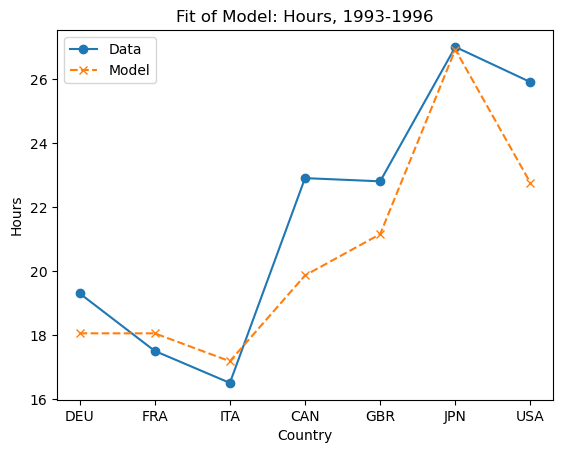

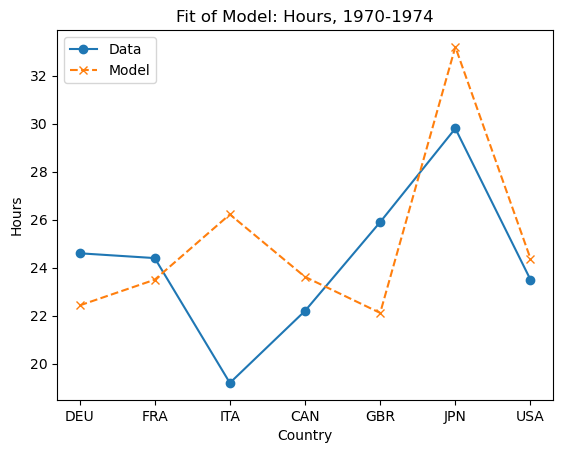

In [7]:
# Step 4: Plot the Results
# Calculate Model Hours
hmodel9396 = 100 *(1-theta)/ (alfa/(1-data_tau9396)*data_c2y9396 + (1-theta))
hmodel7074 = 100 *(1-theta)/ (alfa/(1-data_tau7074)*data_c2y7074 + (1-theta))

# Plot the Data versus Model for the 7 countries
import matplotlib.pyplot as plt
def makefigures(fig_no, hdata, hmodel, country, title):
    plt.figure(fig_no)
    plt.plot(country, hdata, "o-", label="Data")
    plt.plot(country, hmodel, "x--", label="Model")
    plt.xlabel("Country")
    plt.ylabel("Hours")
    plt.title(title)
    plt.legend()
    plt.show()

makefigures(1, data_hdata9396, hmodel9396, data_country, "Fit of Model: Hours, 1993-1996")
makefigures(2, data_hdata7074, hmodel7074, data_country, "Fit of Model: Hours, 1970-1974")

In [8]:
hmodel = pd.concat([hmodel9396,hmodel7074],axis=0)
hmodel

0     18.049977
1     18.049977
2     17.178064
3     19.859855
4     21.149105
5     26.916854
6     22.748331
7     22.427486
8     23.499803
9     26.219531
10    23.617122
11    22.115566
12    33.196110
13    24.375667
dtype: float64

In [9]:
#Update the Predicted vs Actual Hours with the calibrated Alpha
data = pd.DataFrame(
    {'period': data['period'],
     'country': data['country'],
     'h': data['h'],
     'predicted_h': hmodel,
     'tau': data['tau'],
     'c2y': data['c2y']
    })

In [10]:
data

,period,country,h,predicted_h,tau,c2y
0,1993-1996,DEU,19.3,18.049977,0.59,0.74
1,NaN,FRA,17.5,18.049977,0.59,0.74
2,NaN,ITA,16.5,17.178064,0.64,0.69
3,NaN,CAN,22.9,19.859855,0.52,0.77
4,NaN,GBR,22.8,21.149105,0.44,0.83
5,NaN,JPN,27.0,26.916854,0.37,0.68
6,NaN,USA,25.9,22.748331,0.40,0.81
7,1970-1974,DEU,24.6,22.427486,0.52,0.66
8,NaN,FRA,24.4,23.499803,0.49,0.66
9,NaN,ITA,19.2,26.219531,0.41,0.66


The Prescott analysis provides predicted hours worked and actual hours worked for the G7 nations from 1970-1996. The predicted hours worked are based on a model that includes factors such as tax rates, productivity growth, and demographic changes, among others. The actual hours worked are based on data collected from each country.

Looking at the table, we can see that for most countries, the predicted hours worked and actual hours worked are different. For example, for Germany (DEU), the predicted hours worked for the period of 1993-1996 are `18.05` hours, but the actual hours worked are `19.3` hours. Similarly, for France (FRA), the predicted hours worked are 18.05 hours, but the actual hours worked are `17.5` hours.

The predicted and actual hours worked vary across countries as well. For instance, Japan (JPN) has the highest predicted hours worked for the period of 1993-1996 at `26.92` hours, while Italy (ITA) has the lowest predicted hours worked at `17.18` hours. However, the actual hours worked for Japan are also the highest at `27` hours, while Italy has the lowest actual hours worked at `16.5` hours.

There are notable differences between the periods of 1993-1996 and 1970-1974 in terms of hours worked by individuals in the G7 countries, as indicated in the Prescott analysis.

Firstly, in 1993-1996, the predicted hours worked were generally lower compared to the predicted hours worked in 1970-1974. This trend can be observed in all countries except Italy, where the predicted hours worked were lower in 1970-1974 compared to 1993-1996. The decline in predicted hours worked during the later period can be attributed to factors such as technological advancements, changes in demographics, and globalization, which may have led to an increase in productivity and a reduction in the need for longer work hours.

Secondly, the actual hours worked were also lower in 1993-1996 compared to 1970-1974, although this trend was not as consistent across all countries. For instance, the actual hours worked decreased in Germany, France, and Italy but increased in Canada, Japan, the UK, and the US. These variations may be attributed to differences in economic policies and labor market conditions across countries during the respective periods.

Lastly, it is worth noting that the difference in predicted and actual hours worked was more significant in the period of 1993-1996 compared to 1970-1974. This suggests that the model utilized in predicting hours worked during the earlier period was more accurate compared to the later period, possibly due to the increased complexity of economic factors influencing work hours during the latter period.

The period of `1993-1996` had lower predicted and actual hours worked compared to `1970-1974` in most G7 countries. The decline in predicted hours worked is likely due to advancements in technology and changes in demographics, while variations in actual hours worked may be attributed to differences in economic policies and labor market conditions. The difference between predicted and actual hours worked was more significant in the period of 1993-1996, indicating that the model was less accurate due to increased complexity in economic factors influencing work hours during that period.

In general, the results of the Prescott analysis suggest that the predicted hours worked and actual hours worked are not always in line with each other. However, the analysis provides valuable insights into the factors that influence hours worked in different countries.

## Question 1B 

In [11]:
# Counterfactual and Welfare Analysis INCOMPLETE
# Remember G7 Countres: GER, FRA, ITA, CAN, GBR, JPN, USA

ID = 4 # Select your base country
counter_ID = 2 # Select the country to use counterfactual analysis
h_base = hmodel9396[ID]   # Hours worked of the base country predicted by the model

h_counter = 100*(1-theta) / (alfa/(1-data_tau9396[counter_ID]) * data_c2y9396[ID] + (1-theta))   # Hours prediction if the country with ID changed its tax rate to the one of the country with counter_ID
print(f'Hours worked for {data_country[ID]} predicted by the model: {h_base:.3f}')
print(f'Counterfactual hours for {data_country[ID]} using the tax system of {data_country[counter_ID]}: {h_counter:.3f}\n')

# Welfare Analysis
CEV_e = np.exp(np.log(h_counter/h_base)+alfa*np.log((100-h_counter)/(100-h_base))) - 1   # Consumption Equivalent Variation
print(f'Welfare gains/losses: {CEV_e*100:.3f} percent in terms of lifetime consumption equivalents')


Hours worked for GBR predicted by the model: 21.149
Counterfactual hours for GBR using the tax system of ITA: 14.707

Welfare gains/losses: -20.463 percent in terms of lifetime consumption equivalents


In [12]:
# Counterfactual and Welfare Analysis 
# Remember G7 Countres: GER, FRA, ITA, CAN, GBR, JPN, USA

ID = 4 # Select your base country, United Kingdom is 4
counter_ID = [0,1,2,3,5,6] # Select the countries to use counterfactual analysis
h_base = hmodel9396[ID]   # Hours worked of the base country predicted by the model

counter_hours = []
CEVs = []
for counter in counter_ID:
    h_counter = round(100*(1-theta) / (alfa/(1-data_tau9396[counter]) * data_c2y9396[ID] + (1-theta)),1)
    counter_hours.append(h_counter)
    
    CEV_e = round(np.exp(np.log(h_counter/h_base)+alfa*np.log((100-h_counter)/(100-h_base))) - 1,3)
    CEVs.append(CEV_e)

In [13]:
counterfactual = pd.DataFrame(
    {'Alternative Tax System': data.iloc[0:7]['country'].drop([4], axis=0),
     'Tax Rate': data.iloc[0:7]['tau'].drop([4], axis=0),
     'Counterfactual Labour Supply Hours': counter_hours,
     'Welfare Changes': CEVs
    })

In [14]:
counterfactual

,Alternative Tax System,Tax Rate,Counterfactual Labour Supply Hours,Welfare Changes
0,DEU,0.59,16.4,-0.143
1,FRA,0.59,16.4,-0.143
2,ITA,0.64,14.7,-0.205
3,CAN,0.52,18.7,-0.068
5,JPN,0.37,23.2,0.049
6,USA,0.40,22.3,0.028


The table presents the results of changing the UK's effective tax rate to levels used in other G7 countries and the resulting welfare changes as measured by the Consumption Equivalent Variation (CEV), assuming the UK economy in `1993-1996` as the baseline. The CEV measures the percentage change in consumption required to make an individual indifferent between the baseline situation and the counterfactual situation.

Based on the table, changing the UK's effective tax rate to levels used in other G7 countries would result in welfare losses for individuals in the UK, as reflected by negative CEV values. The magnitude of the welfare losses varies depending on the country and the corresponding tax rate.

For instance, if the UK were to adopt Germany's tax rate, the counterfactual labor supply hours would be 16.4, and the welfare change would be a negative `14.3%` in consumption equivalent variation. Adopting the tax rates used in France and Italy would result in similar welfare losses, while adopting the tax rates used in Canada, Japan, and the US would result in smaller welfare losses.

It is worth noting that the welfare losses are not the same as the tax revenue gains that the UK government would generate from adopting these alternative tax systems. The welfare losses only reflect the reduction in consumer welfare resulting from changes in labor supply and consumption decisions due to changes in the effective tax rate.

In conclusion, the table indicates that changing the UK's effective tax rate to levels used in other G7 countries would result in welfare losses for individuals in the UK, with varying magnitudes depending on the country and the corresponding tax rate.